In [45]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 45 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_marcr_98d9n2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.109 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [46]:
h2o.ls

<function h2o.h2o.ls()>

In [47]:
h2o.ls()

,key
0,AutoMLSession_AutoML_1_20221212_114054@@quality
1,AutoMLSession_AutoML_2_20221212_120909@@quality
2,AutoMLSession_AutoML_3_20221212_122014@@quality
3,AutoML_1_20221212_114054@@quality
4,AutoML_1_20221212_114054_eventlog
...,...
334,transformation_adb6_GBM_1_AutoML_2_20221212_12...
335,transformation_b178_StackedEnsemble_AllModels_...
336,transformation_b290_XRT_1_AutoML_1_20221212_11...
337,transformation_b610_GLM_1_AutoML_2_20221212_12...


In [48]:
help(h2o.import_file)


Help on function import_file in module h2o.h2o:

import_file(path=None, destination_frame=None, parse=True, header=0, sep=None, col_names=None, col_types=None, na_strings=None, pattern=None, skipped_columns=None, custom_non_data_line_markers=None, partition_by=None, quotechar=None, escapechar=None)
    Import a dataset that is already on the cluster.
    
    The path to the data must be a valid path for each node in the H2O cluster. If some node in the H2O cluster
    cannot see the file, then an exception will be thrown by the H2O cluster. Does a parallel/distributed
    multi-threaded pull of the data. The main difference between this method and :func:`upload_file` is that
    the latter works with local files, whereas this method imports remote files (i.e. files local to the server).
    If you running H2O server on your own machine, then both methods behave the same.
    
    :param path: path(s) specifying the location of the data to import or a path to a directory of files to im

In [49]:
frame =h2o.import_file(r'C:\Users\marcr\MakeAIWork3\opdrachten\practica\week14\les AutoML\dataset_')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
nr_tr= int(frame.shape[0]*0.9)
print(nr_tr)

frame_tr = frame[0:nr_tr,:]
frame_te = frame[nr_tr:,:]
print(frame_tr.shape)
print(frame_te.shape)

5847
(5847, 12)
(650, 12)


In [51]:
frame.mean()

[7.215307064799138,
 0.3396659996921656,
 0.3186332153301524,
 5.443235339387409,
 0.05603386178236109,
 30.525319378174544,
 115.7445744189626,
 0.9946966338309989,
 3.2185008465445586,
 0.5312682776666154,
 10.491800831152837,
 5.818377712790519]

In [55]:
frame.names

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [61]:
#import h2o
#h2o.init()
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=100, max_models=10,seed=1)


In [62]:
aml.train(x=frame.names[0:12],y="quality",training_frame=frame_tr,validation_frame=frame_te)

AutoML progress: |█
13:30:53.460: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:30:53.461: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4173884,0.0131004,0.3979385,0.4309697,0.4269595,0.419092,0.4119824
mean_residual_deviance,0.3515575,0.0137824,0.3302198,0.3649020,0.3601442,0.3461357,0.3563860
mse,0.3515575,0.0137824,0.3302198,0.3649020,0.3601442,0.3461357,0.3563860
null_deviance,916.87994,38.772926,923.6387,902.06244,888.55914,981.35315,888.78625
r2,0.5504565,0.0291833,0.5660349,0.5111448,0.5299488,0.5830499,0.5621041
residual_deviance,410.91376,19.141075,400.55658,440.07187,416.32672,408.4401,389.17355
rmse,0.5928305,0.0117001,0.5746476,0.6040713,0.6001202,0.5883329,0.5969807
rmsle,0.0902107,0.0019009,0.0881335,0.0930985,0.0891907,0.0897083,0.0909224


In [63]:
print(aml.leader)  #  == winningmodel = aml.get_best_model()


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_5_20221212_133053

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.042173467380904314
RMSE: 0.20536179630326648
MAE: 0.14921275277954169
RMSLE: 0.03177313272929183
Mean Residual Deviance: 0.042173467380904314
R^2: 0.9461810145618256
Null degrees of freedom: 5846
Residual degrees of freedom: 5841
Null deviance: 4581.808106721395
Residual deviance: 246.58826377614753
AIC: -1904.324246482989

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.4126900218097113
RMSE: 0.6424095436788835
MAE: 0.518931862239772
RMSLE: 0.09418068188728658
Mean Residual Deviance: 0.4126900218097113
R^2: 0.2743281300895478
Null degrees of freedom: 649
Residual degrees of freedom: 644
Null deviance: 372.1246332531378
Residual deviance: 268.24851417631237
AIC: 1283.3320549414861

ModelMetricsRegressionGLM: stackedens

In [64]:
lb = aml.get_leaderboard()
lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_5_20221212_133053,0.593229,0.35192,0.416997,0.0902928,0.35192
StackedEnsemble_BestOfFamily_1_AutoML_5_20221212_133053,0.593852,0.35266,0.417188,0.0903915,0.35266
XRT_1_AutoML_5_20221212_133053,0.600585,0.360702,0.429289,0.0915664,0.360702
DRF_1_AutoML_5_20221212_133053,0.602795,0.363362,0.429389,0.0918811,0.363362
GBM_4_AutoML_5_20221212_133053,0.622327,0.387291,0.458712,0.0941993,0.387291
GBM_grid_1_AutoML_5_20221212_133053_model_1,0.624984,0.390605,0.450681,0.0946303,0.390605
GBM_3_AutoML_5_20221212_133053,0.625117,0.390771,0.466618,0.0946592,0.390771
GBM_2_AutoML_5_20221212_133053,0.640022,0.409628,0.486932,0.0965393,0.409628
GBM_5_AutoML_5_20221212_133053,0.644344,0.415179,0.490821,0.0972698,0.415179
GBM_1_AutoML_5_20221212_133053,0.665865,0.443376,0.511182,0.100314,0.443376


In [66]:
xgb = aml.get_best_model(algorithm="GBM")


In [73]:
testresult = xgb.predict(frame_te)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [78]:
path_save = r'C:\Users\marcr\MakeAIWork3\opdrachten\practica\week14\les AutoML'
h2o.save_model(xgb,os.path.join(path_save,'model_221212_1344'))

'C:\\Users\\marcr\\MakeAIWork3\\opdrachten\\practica\\week14\\les AutoML\\model_221212_1344\\GBM_4_AutoML_5_20221212_133053'

In [72]:
print(xgb.params.keys())
aml.training_info

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

timestamp,level,stage,message,name,value
13:30:53.459,INFO,Workflow,Project: AutoML_5_20221212_133053,,
13:30:53.460,INFO,Validation,5-fold cross-validation will be used.,,
13:30:53.460,WARN,Validation,"User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.",,
13:30:53.460,INFO,Validation,Setting stopping tolerance adaptively based on the training frame: 0.01307776271171945,,
13:30:53.460,INFO,Validation,Build control seed: 1,,
13:30:53.461,INFO,DataImport,training frame: Frame key: AutoML_5_20221212_133053_training_py_88_sid_a269 cols: 12 rows: 5847 chunks: 29 size: 296715 checksum: 7684848944461080000,,
13:30:53.461,INFO,DataImport,validation frame: Frame key: py_89_sid_a269 cols: 12 rows: 650 chunks: 32 size: 62016 checksum: -6891346234731701360,,
13:30:53.461,INFO,DataImport,leaderboard frame: NULL,,
13:30:53.461,INFO,DataImport,blending frame: NULL,,
13:30:53.461,INFO,DataImport,response column: quality,,


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_1_AutoML_5_20221212_133053,0.632815,0.400455,0.493591,0.0926099,0.400455,135,0.002686,DeepLearning
DRF_1_AutoML_5_20221212_133053,0.633807,0.401711,0.511391,0.0935034,0.401711,696,0.006188,DRF
GBM_1_AutoML_5_20221212_133053,0.634386,0.402446,0.505125,0.0933784,0.402446,444,0.007327,GBM
GBM_4_AutoML_5_20221212_133053,0.636552,0.405199,0.509986,0.0936446,0.405199,408,0.006631,GBM
GBM_5_AutoML_5_20221212_133053,0.637817,0.406811,0.517844,0.0937923,0.406811,341,0.006674,GBM
XRT_1_AutoML_5_20221212_133053,0.638512,0.407698,0.516073,0.0940248,0.407698,787,0.006986,DRF
GBM_2_AutoML_5_20221212_133053,0.640138,0.409777,0.510858,0.0941086,0.409777,290,0.007072,GBM
GBM_3_AutoML_5_20221212_133053,0.640713,0.410513,0.513627,0.0938681,0.410513,437,0.006998,GBM
StackedEnsemble_AllModels_1_AutoML_5_20221212_133053,0.64241,0.41269,0.518932,0.0941807,0.41269,601,0.030394,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20221212_133053,0.643101,0.413578,0.519746,0.0943878,0.413578,421,0.027309,StackedEnsemble


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

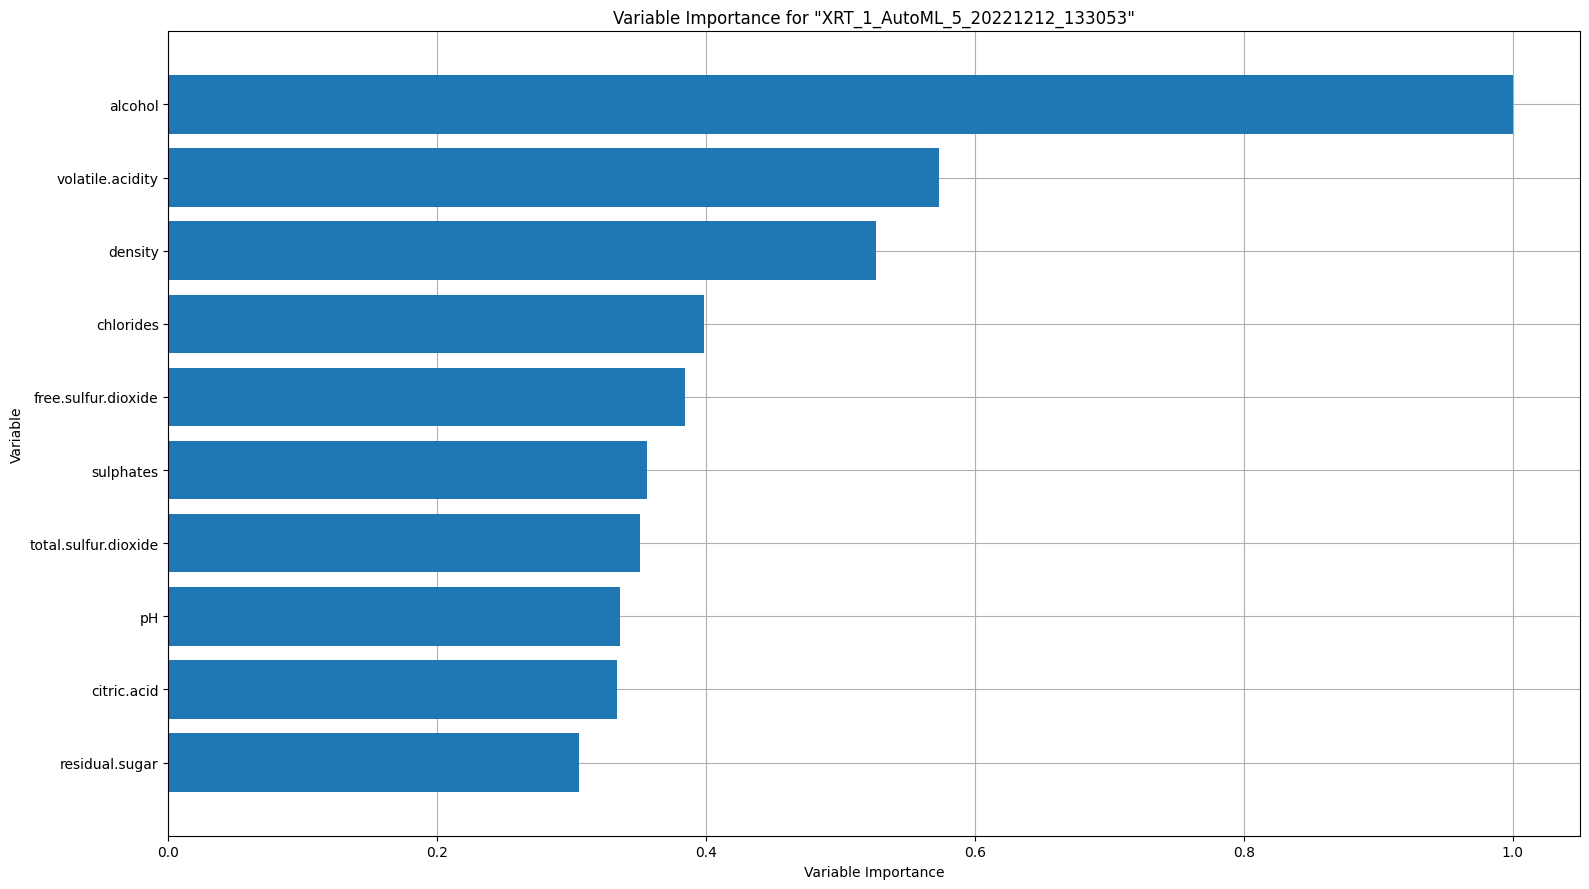

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

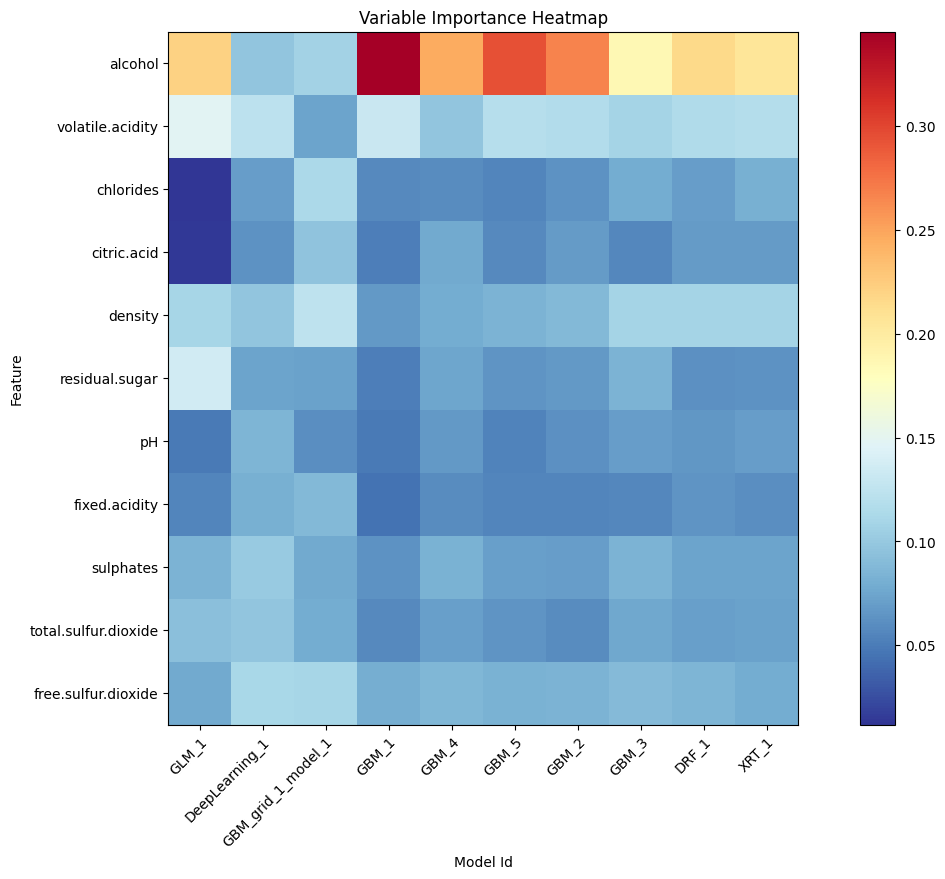

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

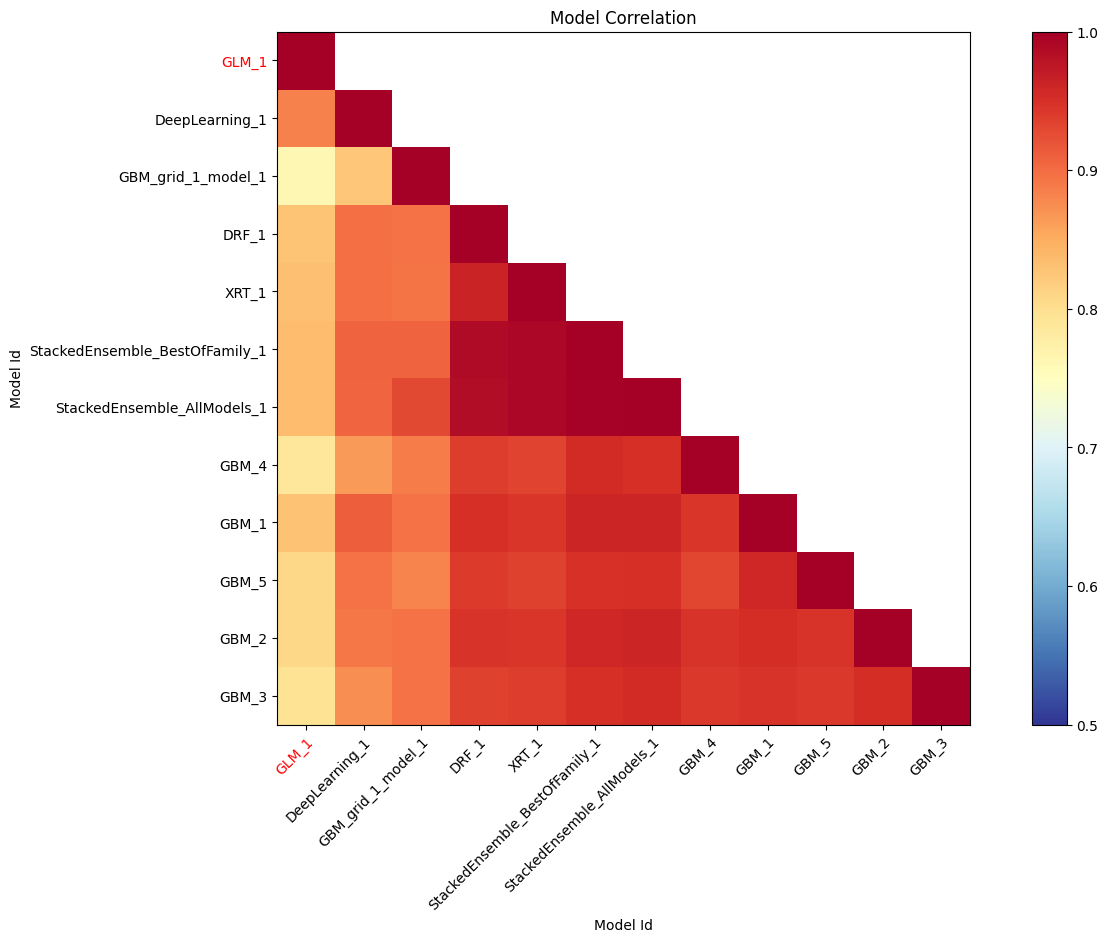

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

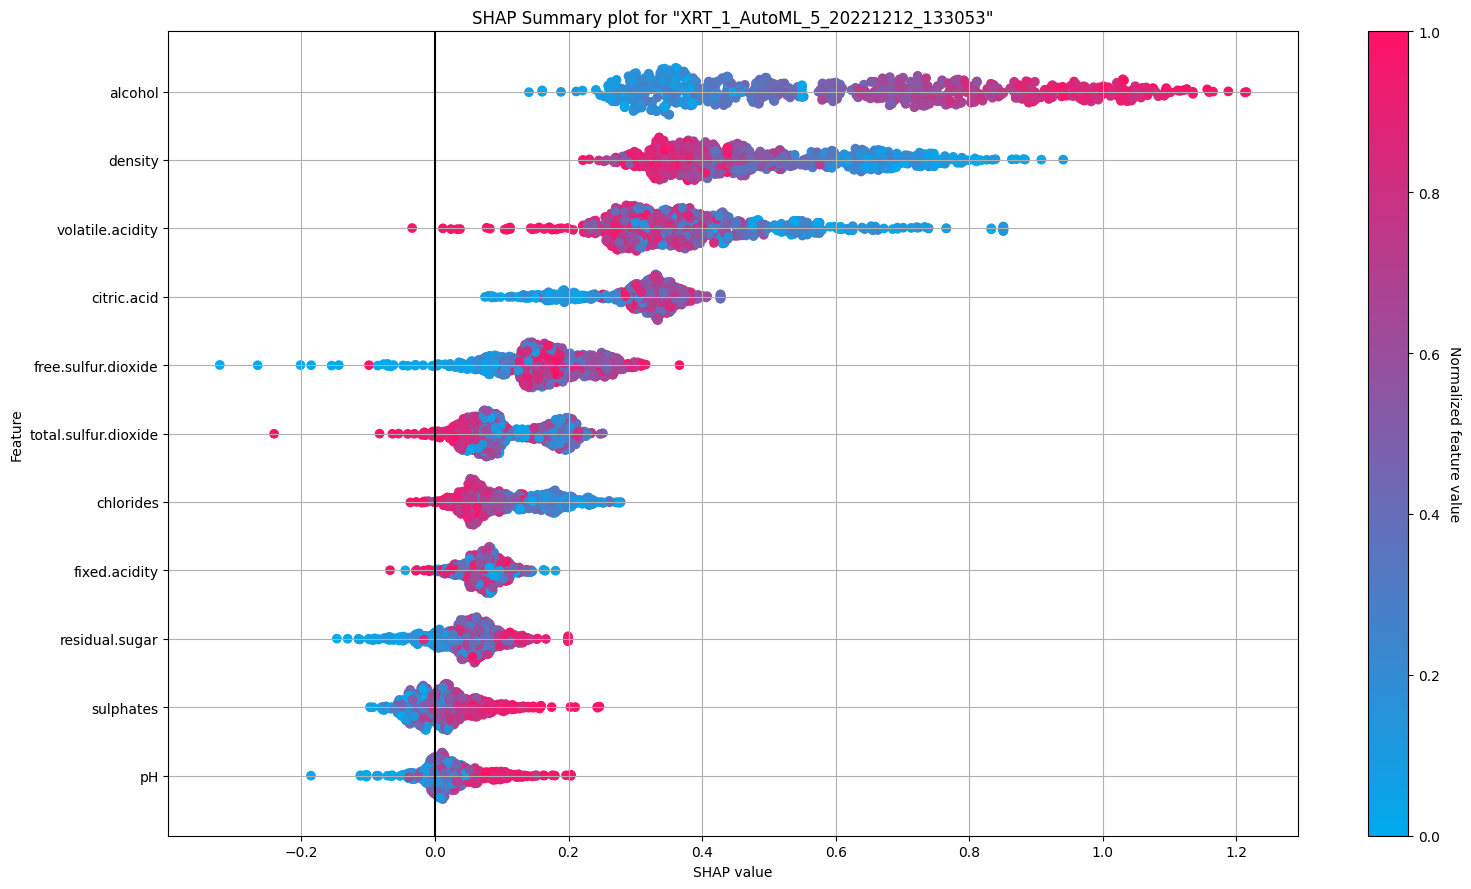

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

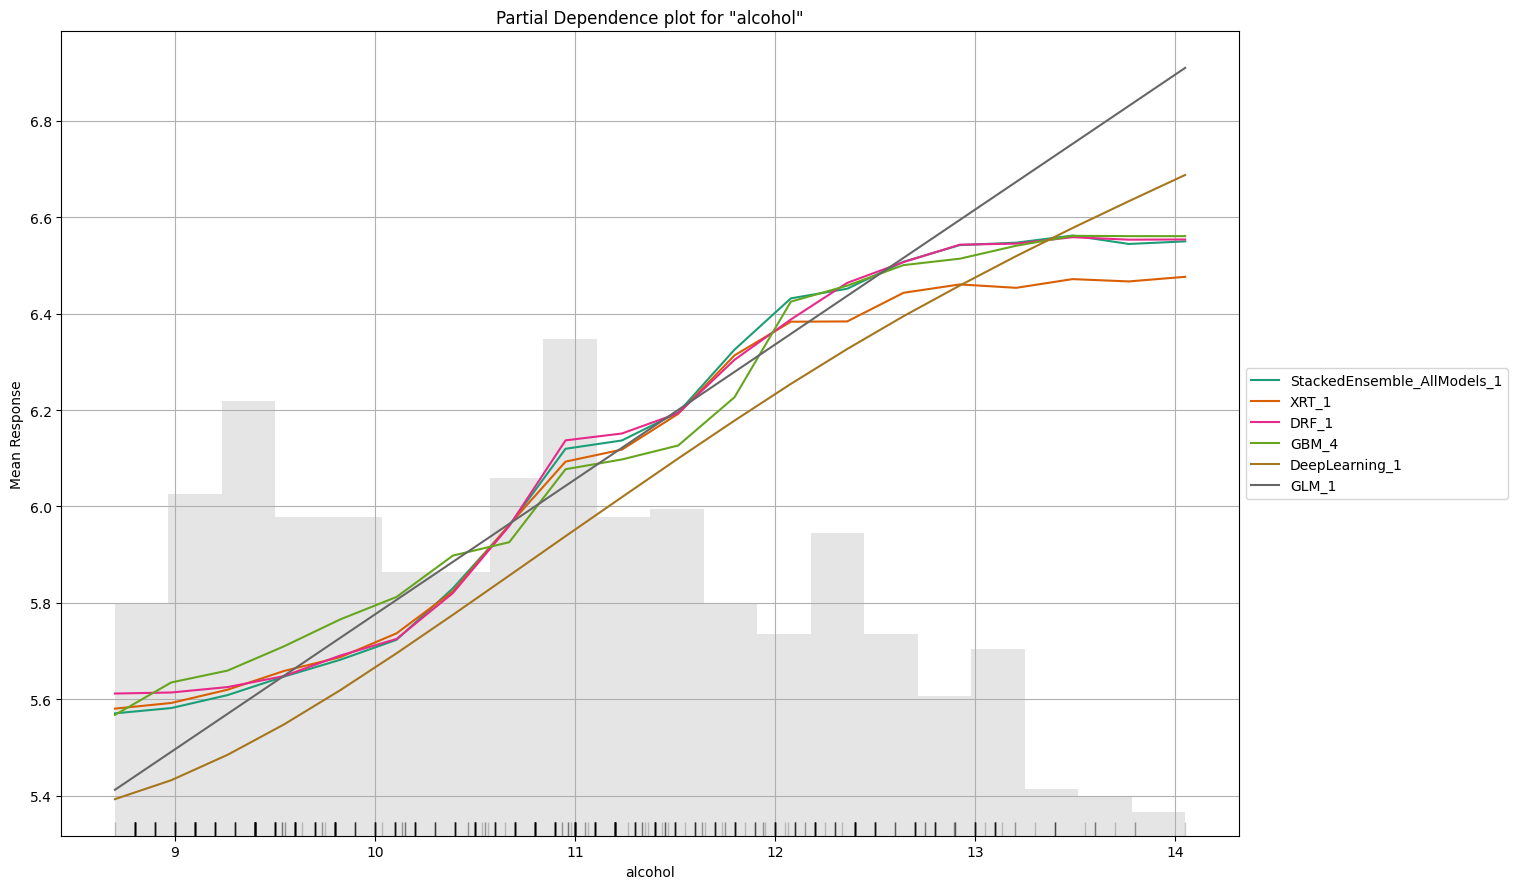

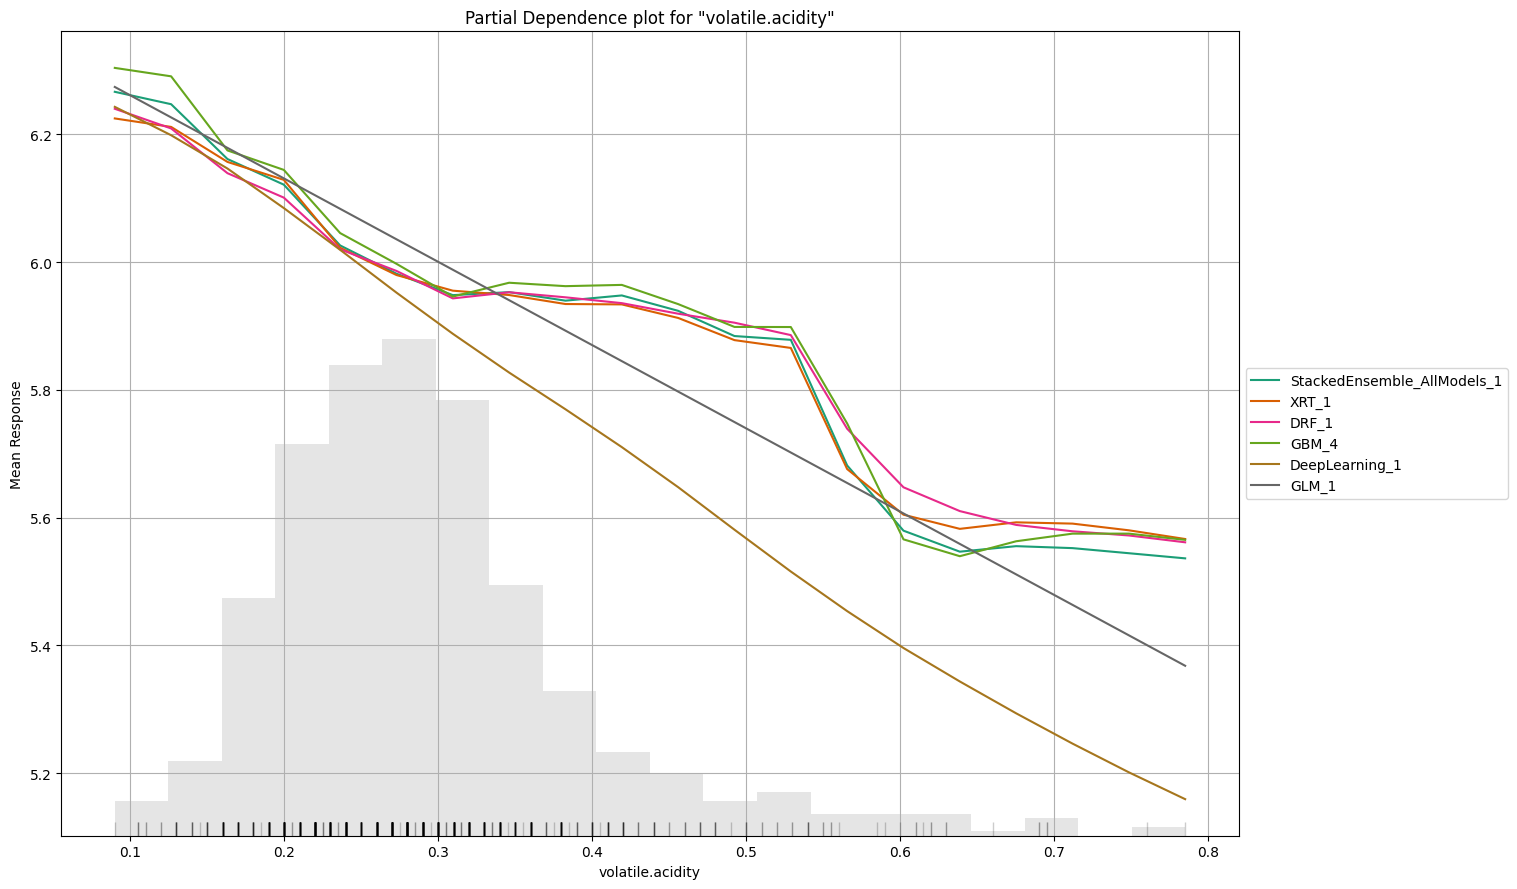

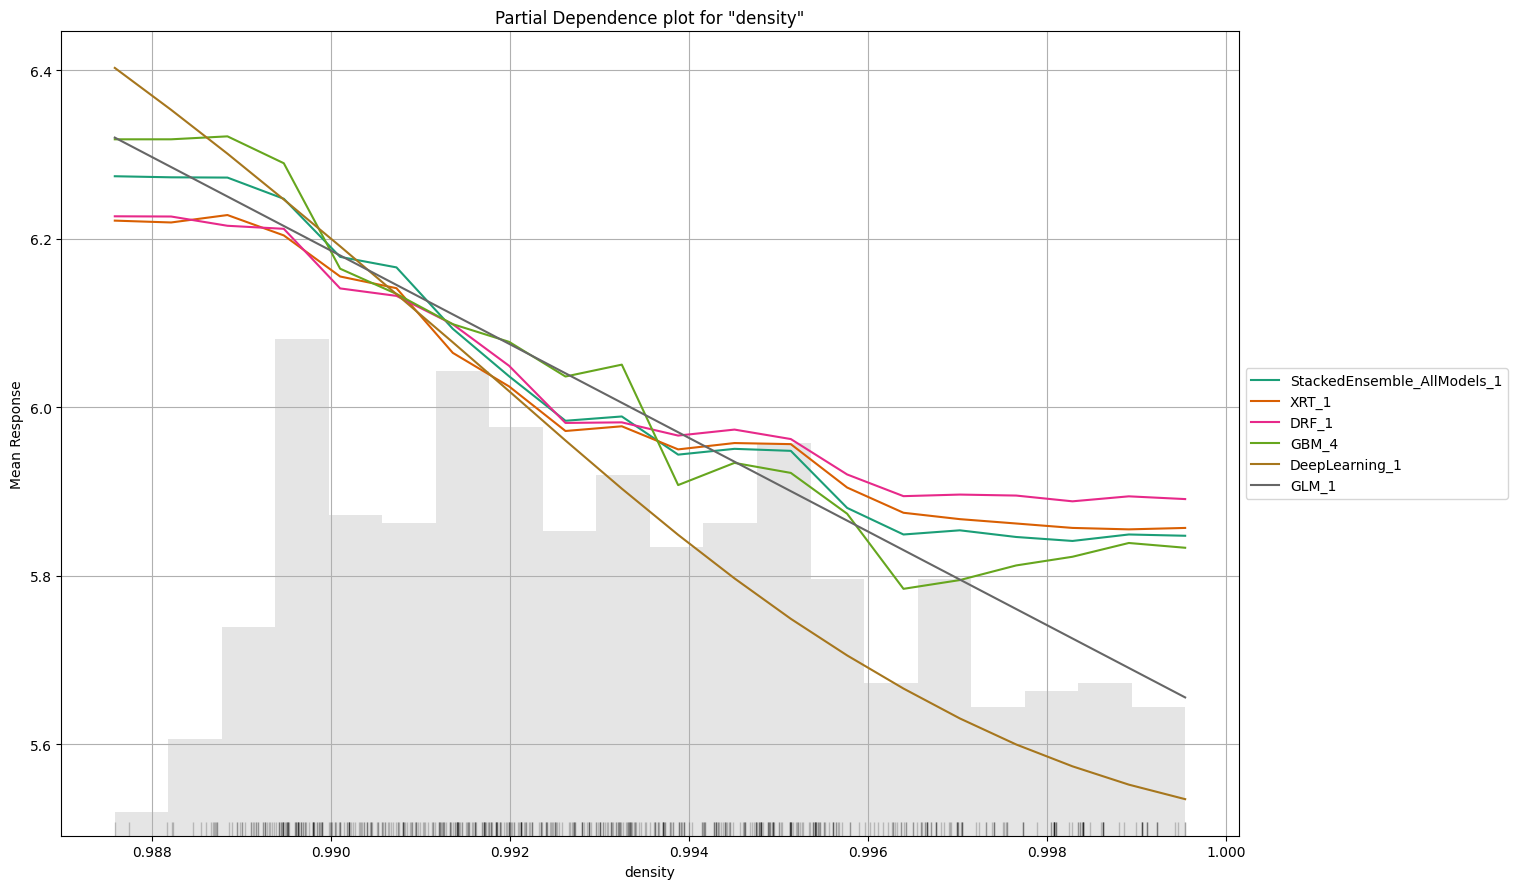

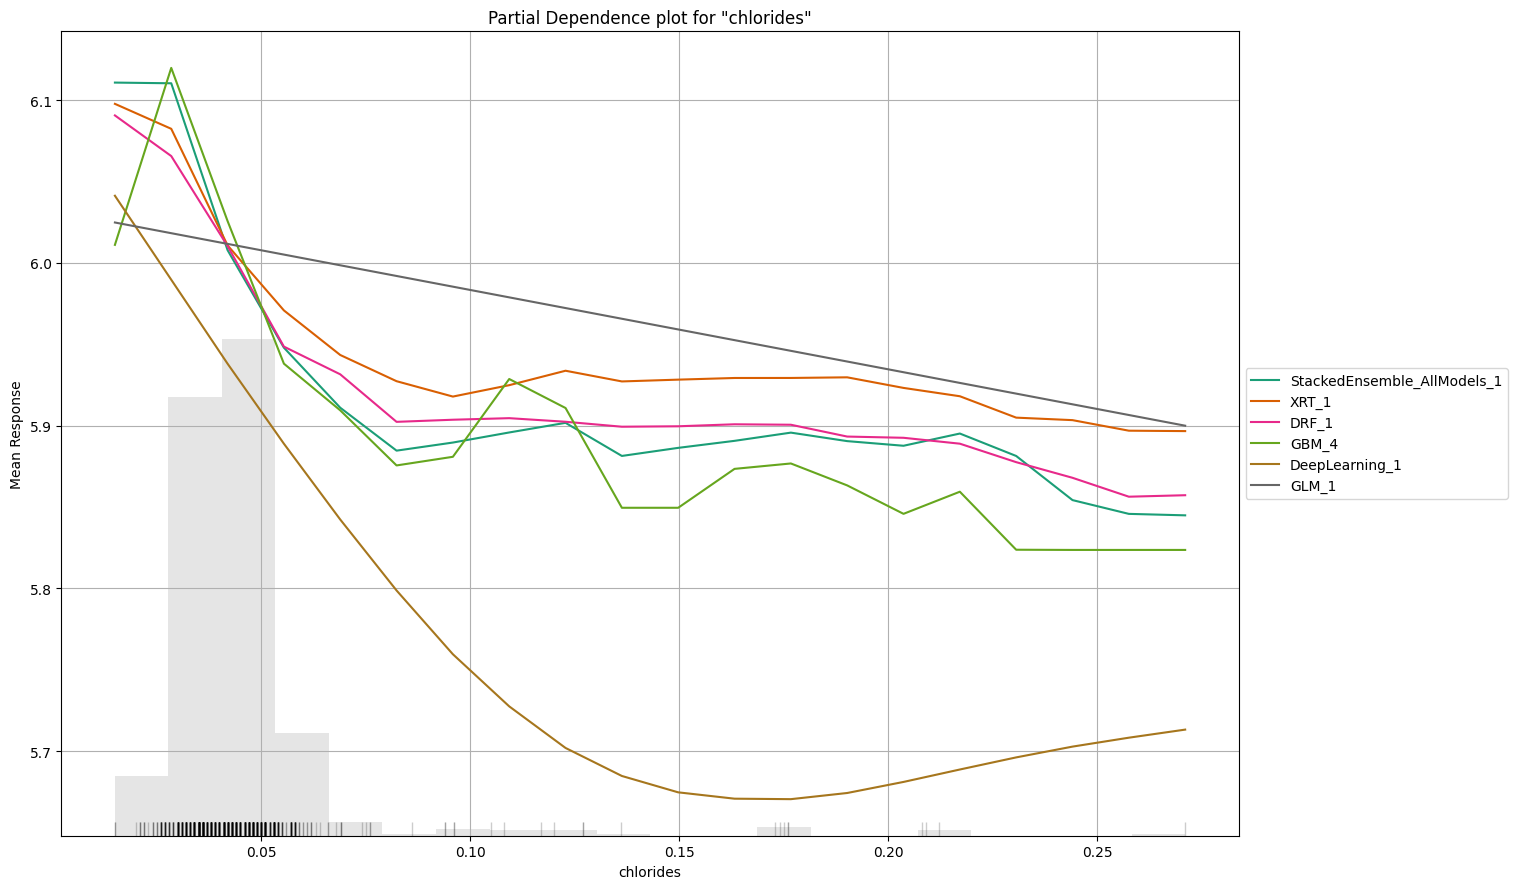

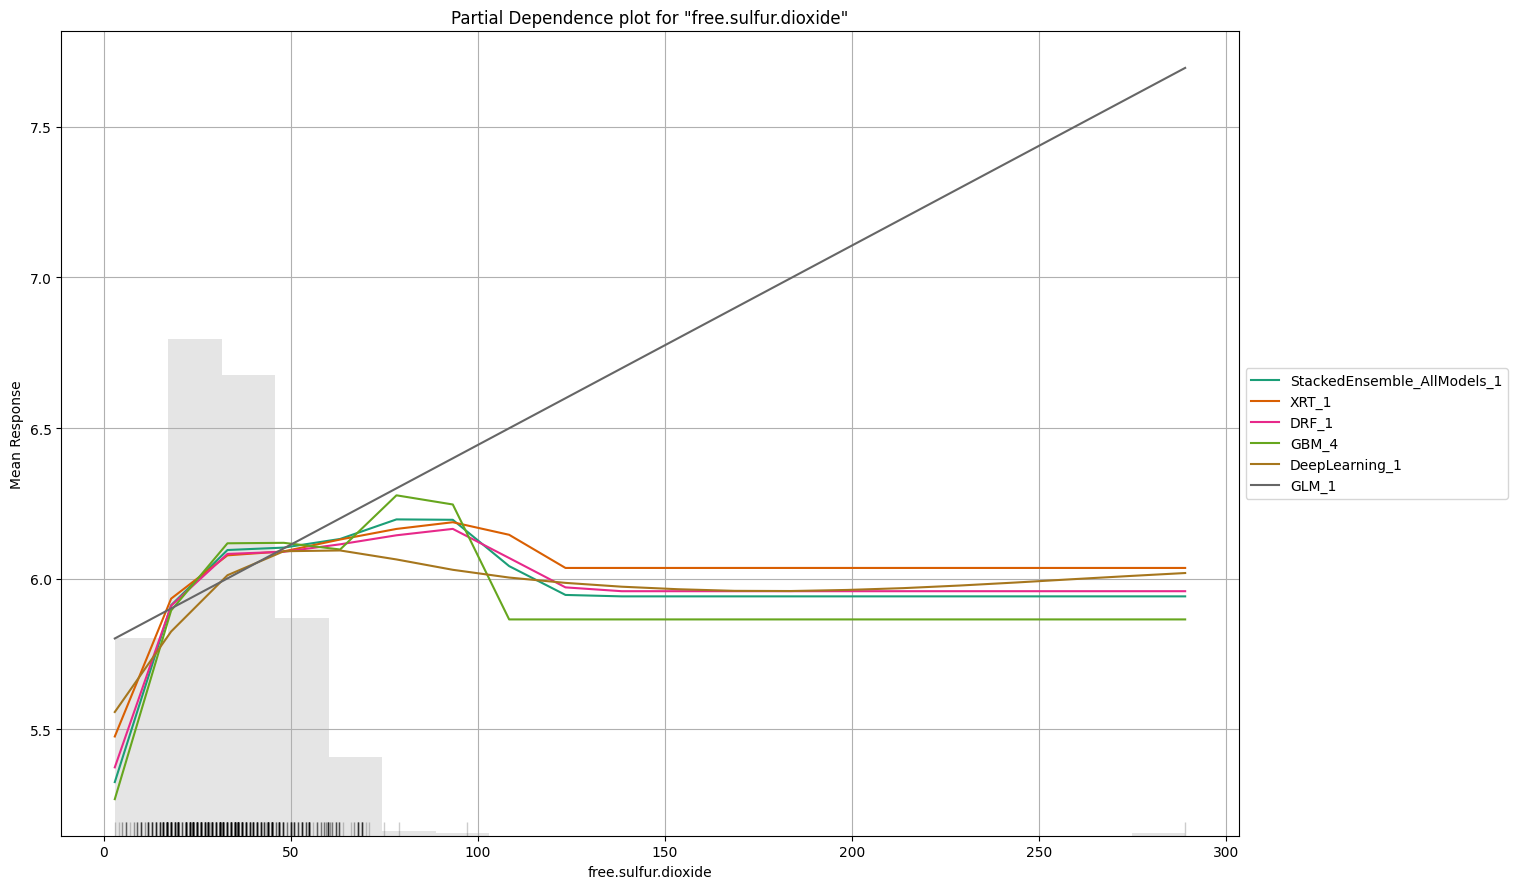

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_1_AutoML_5_20221212_133053,0.632815,0.400455,0.493591,0.0926099,0.400455,135,0.002686,DeepLearning
DRF_1_AutoML_5_20221212_133053,0.633807,0.401711,0.511391,0.0935034,0.401711,696,0.006188,DRF
GBM_1_AutoML_5_20221212_133053,0.634386,0.402446,0.505125,0.0933784,0.402446,444,0.007327,GBM
GBM_4_AutoML_5_20221212_133053,0.636552,0.405199,0.509986,0.0936446,0.405199,408,0.006631,GBM
GBM_5_AutoML_5_20221212_133053,0.637817,0.406811,0.517844,0.0937923,0.406811,341,0.006674,GBM
XRT_1_AutoML_5_20221212_133053,0.638512,0.407698,0.516073,0.0940248,0.407698,787,0.006986,DRF
GBM_2_AutoML_5_20221212_133053,0.640138,0.409777,0.510858,0.0941086,0.409777,290,0.007072,GBM
GBM_3_AutoML_5_20221212_133053,0.640713,0.410513,0.513627,0.0938681,0.410513,437,0.006998,GBM
StackedEnsemble_AllModels_1_AutoML_5_20221212_133053,0.64241,0.41269,0.518932,0.0941807,0.41269,601,0.030394,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20221212_133053,0.643101,0.413578,0.519746,0.0943878,0.413578,421,0.027309,StackedEnsemble


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [86]:
#xgb.explain(frame_te,exclude_explanations=['residual_analysis','ice'])
#aml.explain(frame_te,include_explanations=["shap_summary"])
aml.explain(frame_te,exclude_explanations=['residual_analysis','ice'])